# Time Series 

**[1] Python Datetime module**<br>
- Datetime objects<br>
- Conversion between string and datetime<br>

**[2] Pandas**<br>
- Function <code>to_datetime()</code><br>
- DatetimeIndex<br>
- Information extraction<br>
- Method <code>resample()</code><br>

## [1] Python DateTime module

In [1]:
import datetime as dt

- **Datetime obejct - creation**

In [2]:
# Use datetime()
mydt = dt.datetime(2021, 7, 1)
mydt

datetime.datetime(2021, 7, 1, 0, 0)

In [3]:
# Get current time by using datetime.now()
datetime_now = dt.datetime.now()
datetime_now

datetime.datetime(2022, 11, 11, 11, 38, 41, 826895)

- **Datetime obejct - attributes**

In [4]:
mydt = dt.datetime(year = 2021, month = 7, day = 6, hour = 11, minute = 21)
mydt

datetime.datetime(2021, 7, 6, 11, 21)

In [5]:
print(mydt.year)
print(mydt.month)
print(mydt.day)
print(mydt.hour)
print(mydt.minute)

2021
7
6
11
21


- **Format codes**

|Directive|Meaning|
|:--|:--|
|%Y|Four-digit year|
|%y|Two-digit year|
|%m|Two-digit month [01,12]|
|%d|Two-digit day [01,31]|
|%H|Hour (24-hour clock) [00,23]|
|%M|Two-digit minute [00,59]|
|%S|Two-digit minute [00,59]|


- **Methods - <code>strptime()</code>**

In [6]:
string1 = '2019-01-03'
datetime1 = dt.datetime.strptime(string1, '%Y-%m-%d')
datetime1

datetime.datetime(2019, 1, 3, 0, 0)

In [7]:
string2 = '03/01/2019'
datetime2 = dt.datetime.strptime(string2, '%d/%m/%Y')
datetime2

datetime.datetime(2019, 1, 3, 0, 0)

In [8]:
string3 = '03/01/19'
datetime3 = dt.datetime.strptime(string3, '%d/%m/%y')
datetime3

datetime.datetime(2019, 1, 3, 0, 0)

In [9]:
string4 = '10:30 03/01/19'
datetime4 = dt.datetime.strptime(string4, '%H:%M %d/%m/%y')
datetime4

datetime.datetime(2019, 1, 3, 10, 30)

- **Methods - <code>strftime()</code>**<br>

In [10]:
datetime5 = dt.datetime(2019,1,3)
datetime5

datetime.datetime(2019, 1, 3, 0, 0)

In [11]:
string5 = datetime5.strftime('%d-%m-%Y')
string5

'03-01-2019'

- **Timedelta obeject**

In [12]:
# Create two datetime objects
dt1 = dt.datetime(2021,6,15)
dt2 = dt.datetime(2021,7,6)

# Create a timedelta obejct
diff = dt2-dt1
type(diff)

datetime.timedelta

In [13]:
# Access attribute of a timedelta object
diff.days

21

## Exercise.A

**(A.1) Create a datetime object named <code>dt_start</code> with the following arguments: year = 2022, month = 8, day = 15.**

**(A.2) Convert the following variable <code>str1</code> to a datetime object named <code>dt_end</code>.**

In [ ]:
str1 = "2022-11-13"

**(A.3) How many days between <code>dt_start</code> and <code>dt_end</code>.**

## [2] Pandas 

In [14]:
import pandas as pd

### [2.1] Function <code>to_datetime()</code>

- **Example-1: dd/mm/yyyy**

In [15]:
df1 = pd.DataFrame({"date": ['07/06/2020','26/03/2020','13/10/2020']})
df1

,date
0,07/06/2020
1,26/03/2020
2,13/10/2020


In [16]:
pd.to_datetime(df1["date"], dayfirst = True)

0   2020-06-07
1   2020-03-26
2   2020-10-13
Name: date, dtype: datetime64[ns]

- **Example-2: dd.mmm.yyyy**

In [17]:
df2 = pd.DataFrame({"date": ['07.Jun.2020','26.Mar.2020','13.Oct.2020']})
df2

,date
0,07.Jun.2020
1,26.Mar.2020
2,13.Oct.2020


In [18]:
pd.to_datetime(df2["date"])

0   2020-06-07
1   2020-03-26
2   2020-10-13
Name: date, dtype: datetime64[ns]

- **Example-3: yyyy-mm-dd hh:mm:ss**

In [19]:
df3 = pd.DataFrame({"date": ['2021-06-01 18:20:13','2021-06-02 07:21:18','2021-06-03 10:20:17']})
df3

,date
0,2021-06-01 18:20:13
1,2021-06-02 07:21:18
2,2021-06-03 10:20:17


In [20]:
pd.to_datetime(df3["date"])

0   2021-06-01 18:20:13
1   2021-06-02 07:21:18
2   2021-06-03 10:20:17
Name: date, dtype: datetime64[ns]

- **Example-4: yyyy-mm.dd**  (Formats not supported by pandas)

In [21]:
df4 = pd.DataFrame({"date": ['2021-06.01','2021-06.02','2021-06.03']})
df4

,date
0,2021-06.01
1,2021-06.02
2,2021-06.03


In [22]:
pd.to_datetime(df4["date"], format = '%Y-%m.%d')

0   2021-06-01
1   2021-06-02
2   2021-06-03
Name: date, dtype: datetime64[ns]

### [2.2] DatetimeIndex

- **Import dataset with datetime column**

In [23]:
covid_df = pd.read_csv("../dataset/covid_2021.csv", parse_dates = ["date"], index_col = 0)
covid_df.head(10)

,positive
date,
2021-01-01,345
2021-01-02,523
2021-01-03,443
2021-01-04,936
2021-01-05,788
2021-01-06,708
2021-01-07,735
2021-01-08,649
2021-01-09,414


- **Select a subset by DatetimeIndex**

In [24]:
# by month
covid_df.loc['2021-05',:].head(5)

,positive
date,
2021-05-01,251
2021-05-02,296
2021-05-03,510
2021-05-04,463
2021-05-05,494


In [25]:
# range
covid_df.loc['2021-05-25':'2021-06-01',:]

,positive
date,
2021-05-25,427
2021-05-26,363
2021-05-27,384
2021-05-28,347
2021-05-29,199
2021-05-30,185
2021-05-31,344
2021-06-01,386


In [26]:
# condition
covid_df[covid_df.index < '2021-01-10']

,positive
date,
2021-01-01,345
2021-01-02,523
2021-01-03,443
2021-01-04,936
2021-01-05,788
2021-01-06,708
2021-01-07,735
2021-01-08,649
2021-01-09,414


- **Line chart**

<AxesSubplot:xlabel='date'>

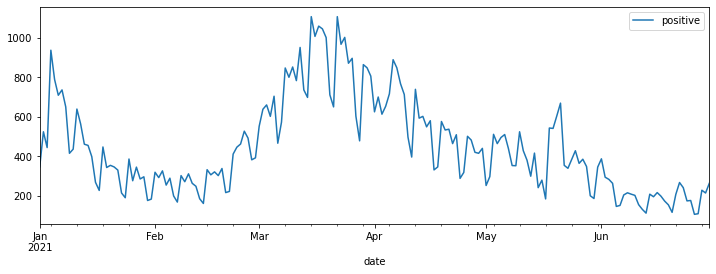

In [27]:
covid_df.plot(y = 'positive', figsize = (12,4))

## Exercise.B

**(B.1) Import dataset <code>fashion.csv</code> and set the column <code>Date</code>as DatetimeIndex.**

**(B.2) Draw a line chart to show Tiger_of_Sweden’s sales in 2016.**

**(B.3) Use a multiple line chart to show the sales of Eton, Levi_s, and Tiger_of_Sweden from 2014 to 2016.**

### [2.3] Information extraction

- **Add "month" as a new column**

In [28]:
covid_df["month"] = covid_df.index.month
covid_df

,positive,month
date,,
2021-01-01,345,1
2021-01-02,523,1
2021-01-03,443,1
2021-01-04,936,1
2021-01-05,788,1
...,...,...
2021-06-26,105,6
2021-06-27,108,6
2021-06-28,227,6


- **Add "day_of_week" as a new column**

In [29]:
covid_df["day_of_week"] = covid_df.index.day_name()
covid_df

,positive,month,day_of_week
date,,,
2021-01-01,345,1,Friday
2021-01-02,523,1,Saturday
2021-01-03,443,1,Sunday
2021-01-04,936,1,Monday
2021-01-05,788,1,Tuesday
...,...,...,...
2021-06-26,105,6,Saturday
2021-06-27,108,6,Sunday
2021-06-28,227,6,Monday


- **Group data by new column**

In [30]:
covid_df

,positive,month,day_of_week
date,,,
2021-01-01,345,1,Friday
2021-01-02,523,1,Saturday
2021-01-03,443,1,Sunday
2021-01-04,936,1,Monday
2021-01-05,788,1,Tuesday
...,...,...,...
2021-06-26,105,6,Saturday
2021-06-27,108,6,Sunday
2021-06-28,227,6,Monday


In [31]:
covid_df.groupby("day_of_week").positive.mean()

day_of_week
Friday       480.538462
Monday       521.153846
Saturday     335.961538
Sunday       325.000000
Thursday     476.760000
Tuesday      506.115385
Wednesday    501.961538
Name: positive, dtype: float64

### [2.4] Resampling

- **Aggregate daily data to monthly data**

In [32]:
# Step1: Get a Resampler object  
covid_rs = covid_df.resample('M')
type(covid_rs)

pandas.core.resample.DatetimeIndexResampler

In [33]:
#Step2: Call an aggregate function
covid_month = covid_rs.positive.sum()
covid_month

date
2021-01-31    13138
2021-02-28     8709
2021-03-31    24853
2021-04-30    16610
2021-05-31    12082
2021-06-30     5966
Freq: M, Name: positive, dtype: int64

- **Cast to index at a particular frequency**

In [35]:
covid_month.index = covid_month.index.to_period('M')
covid_month

date
2021-01    13138
2021-02     8709
2021-03    24853
2021-04    16610
2021-05    12082
2021-06     5966
Freq: M, Name: positive, dtype: int64

- **Visualize monthly data**

<AxesSubplot:xlabel='date'>

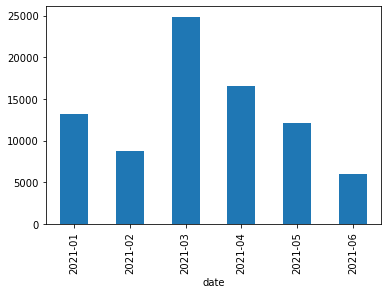

In [36]:
covid_month.plot(kind = "bar", y = "positive")

- **Aggregate daily data to weekly data**

In [37]:
covid_df.resample('W').sum()

,positive,month
date,,
2021-01-03,1311,3
2021-01-10,4665,7
2021-01-17,3005,7
2021-01-24,2217,7
2021-01-31,1940,7
2021-02-07,1840,14
2021-02-14,1734,14
2021-02-21,2030,14
2021-02-28,3105,14


## Exercise.C

**(C.1) Use the dataframe <code>fashion_df</code> in Exercise.B. Extract the month information from the DatetimeIndex and add it to a new column named <code>Month</code>.**

**(C.2) Calculate the average monthly sales of <code>Tiger_of_Sweden</code> using the column obtained in (C.1). Display the results in a bar chart.**<br>
Hint: <code>groupby()</code>

**(C.3) Group the data by year and calculate the total annual sales of each brand. Store the result in a new variable named <code>year_df</code>.**<br>
Hint: <code>resample()</code>

**(C.4) Use the year as the index of <code>year_df</code>.**<br>
Hint: <code>to_period()</code>

**(C.5) Display the result obtained in (C.4) with a heatmap, excluding the <code>Month</code> column</code>.**